# Лабораторная работа № 3.4

### Задача:

Вычислить первую и вторую производную от таблично заданной функции
$y_i = f( x_i ), i= 0,...,4 $
в точке $x = X^*$.

In [1]:
import math

In [2]:
Table = [(-0.2, -0.20136), (0, 0), (0.2, 0.20136), (0.4, 0.41152), (0.6, 0.64350)]
X_star = 0.2

| Table |||
| :-------: | :-------: | :-------: |
| $$ i $$ | $$ x_{i} $$ | $$ y_{i} $$ |
| 0 | -0.2 | -0.20136 | 
| 1 | 0 | 0 | 
| 2 | 0.2 | 0.20136 | 
| 3 | 0.4 | 0.41152  |
| 4 | 0.6 | 0.64350 |

$$ X^* = 0.2 $$

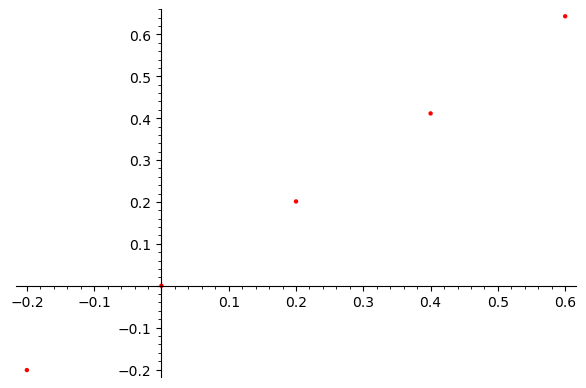

In [3]:
list_plot(Table, color = 'red')

In [4]:
class NewtonPolynomial():
    
    def __init__(self, Table):
        self.table = Table[:]
        self.memo = {}
        
    def __y(self, a, b):
        if (a, b) not in self.memo:
            if a == b:
                self.memo[(a, b)] = self.table[a][1]
            else:
                self.memo[(a, b)] = (self.__y(a, b-1) - self.__y(a+1, b)) / (self.table[a][0] - self.table[b][0])
            
        return self.memo[(a, b)]
    
    def __call__(self, x):
        result = self.table[0][1]
        
        for i in range(1, len(self.table)):
            temp = 1
            
            for j in range(i):
                temp *= (x - self.table[j][0])
        
            result += self.__y(0, i) * temp
        
        return result
    
    def add_point(self, tup = None):
        if tup != None and type(tup) is tuple and len(tup) == 2:
            self.table.append(tup)

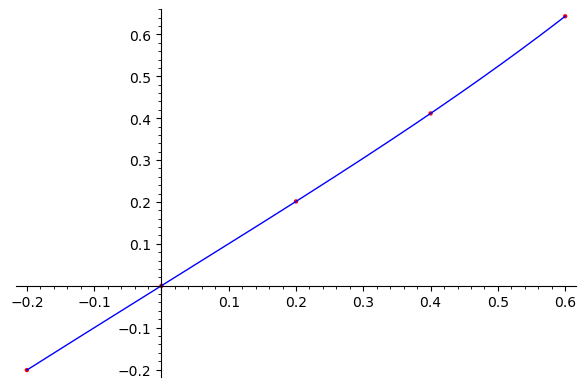

In [5]:
Var = NewtonPolynomial(Table)

plot(Var, (-0.2, 0.6)) +\
list_plot(Table, color = 'red')

### Первая производная

$ f(x + h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f''''(x) + O(h^5) $

$ f(x - h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f''''(x) + O(h^5) $

#### Направленная разность

$ f'(x) = \frac{f(x + h) - f(x)}{h} + O(h) $

In [6]:
f_div = lambda f, x, h: (f(x + h) - f(x)) / h

In [7]:
f_div(Var, X_star, 0.2) # правосторонняя

1.05080000000000

In [8]:
f_div(Var, X_star - 0.2, 0.2) # левосторонняя

1.00680000000000

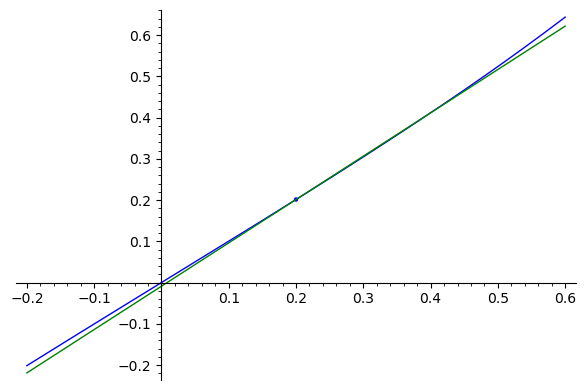

In [9]:
G = plot(Var, (-0.2, 0.6)) +\
plot(Var(X_star) + f_div(Var, X_star, 0.2) * (x - X_star), (-0.2, 0.6), color='green') +\
point((X_star, Var(X_star)))

G.show()

#### Центральная разность

$ f'(x) = \frac{f(x + h) - f(x - h)}{2h} + O(h^2) $

In [10]:
f_div = lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h)

In [11]:
f_div(Var, X_star, 0.2)

1.02880000000000

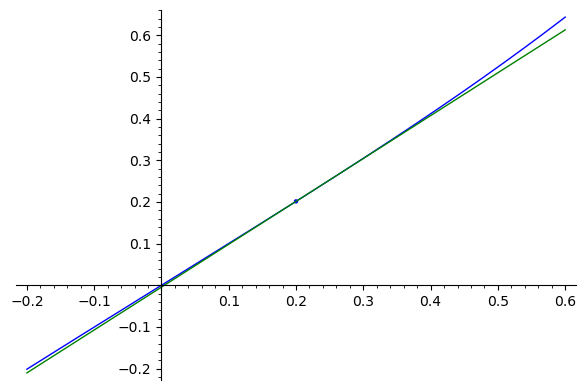

In [12]:
G = plot(Var, (-0.2, 0.6)) +\
plot(Var(X_star) + f_div(Var, X_star, 0.2) * (x - X_star), (-0.2, 0.6), color='green') +\
point((X_star, Var(X_star)))

G.show()

### Вторая производная

$ f''(x) = \frac{\frac{f(x + h) - f(x)}{h} - \frac{f(x) - f(x - h)}{h}}{h} + O(h^2) = \frac{f(x + h) - 2f(x) + f(x - h)}{h^2} + O(h^2)$

In [13]:
f_div2 = lambda f, x, h: (f_div(f, x + h, h) - f_div(f, x, h)) / h

In [14]:
f_div2(Var, X_star, 0.2)

0.382749999999998

In [15]:
f_div2 = lambda f, x, h: (f(x - h) - 2 * f(x) + f(x + h)) / (h**2)

In [16]:
f_div2(Var, X_star, 0.2)

0.220000000000003